In [1]:
from pyCHX.chx_packages import *
%matplotlib notebook
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
import pickle as cpk
from pyCHX.chx_xpcs_xsvs_jupyter_V1 import *
from pyCHX.chx_generic_functions import get_qval_qwid_dict,get_roi_mask_qval_qwid_by_shift
import itertools

In [2]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


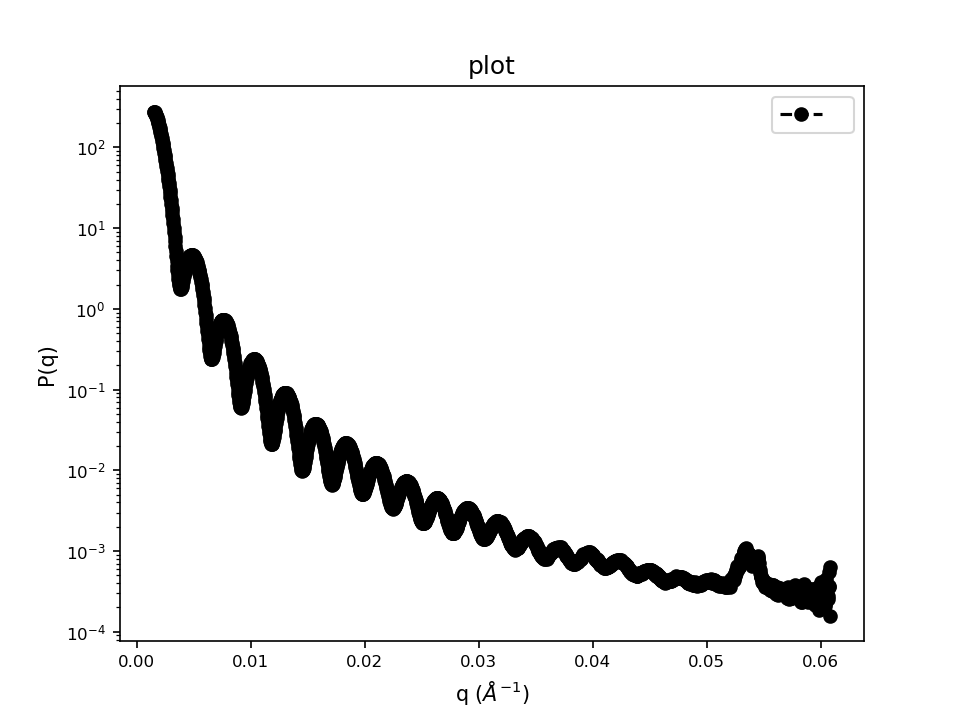

Text(0, 0.5, 'P(q)')

In [4]:
## Load form factor
 

fig, ax = plt.subplots()
plot1D( x=qp, y=pq, ls='--', m='o', c='k', ax=ax, logy=True )
ax.set_xlabel('q ('r'$\AA^{-1}$)')        
ax.set_ylabel('P(q)')

In [8]:
### Fit form factor

%run -i ~/pyCHX_link/pyCHX/SAXS.py

In [9]:
# for 250 nm
fitp, fitpe,   q_, fitq, result    = get_form_factor_fit_lmfit( qp, pq, 
            guess_values={'radius': 1186, 'sigma':0.02,'delta_rho':3e-9, 'background':5e-6,  
                          'qpower_scale':5e-10, 'qpower': -4.0 }, 
            guess_limit = { 'radius': [1000, 1500],   'sigma':[1e-3, .5], 'delta_rho': [1e-16, 1e-4], 
                           'background':  [1e-6, 1e-3], 'qpower_scale': [1e-16, 1], 'qpower': [ -5,-3]},                                                
            fit_range=[0.0022, 0.04], 
            fit_variables={'radius': True,  'sigma':True,  'delta_rho':True,  'background': True,
                            'qpower_scale':True,  'qpower':True},
            fit_func='G',    qpower_bg= True  )
r,sig=fitp[ 'radius'], fitp['sigma']

radius, sigma, delta_rho, background, qpower_scale, qpower =  (fitp[ 'radius'], fitp['sigma'],
                                         fitp['delta_rho'],fitp['background'],
                                         fitp[ 'qpower_scale'], fitp['qpower']    ) 
bk= qpower_scale*qp**( qpower ) + background
ff= poly_sphere_form_factor_intensity( qp, radius=radius, sigma=sigma, delta_rho=delta_rho, 
                                      background=0,  num_points= 20,
                                      spread=5,fit_func= 'G'  ) + bk 

print( radius, sigma, delta_rho, background, qpower_scale, qpower )

1187.0899236925627 0.017678711475510662 3.3222369750773862e-09 0.00017587803024095782 2.0459594026966125e-10 -4.102036041533107


In [10]:
report_fit( result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 1039
    # variables        = 6
    chi-square         = 4.54127671
    reduced chi-square = 0.00439620
    Akaike info crit   = -5632.68523
    Bayesian info crit = -5603.00915
[[Variables]]
    radius:        1187.08992 +/- 0.14550747 (0.01%) (init = 1186)
    sigma:         0.01767871 +/- 1.6489e-04 (0.93%) (init = 0.02)
    delta_rho:     3.3222e-09 +/- 1.0262e-11 (0.31%) (init = 3e-09)
    background:    1.7588e-04 +/- 6.1499e-06 (3.50%) (init = 5e-06)
    qpower_scale:  2.0460e-10 +/- 1.8288e-11 (8.94%) (init = 5e-10)
    qpower:       -4.10203604 +/- 0.01719651 (0.42%) (init = -4)
[[Correlations]] (unreported correlations are < 0.100)
    C(qpower_scale, qpower)     =  0.990
    C(delta_rho, qpower_scale)  = -0.629
    C(sigma, qpower_scale)      = -0.627
    C(sigma, delta_rho)         =  0.615
    C(sigma, qpower)            = -0.565
    C(delta_rho, qpower)        = -0.549

<IPython.core.display.Javascript object>


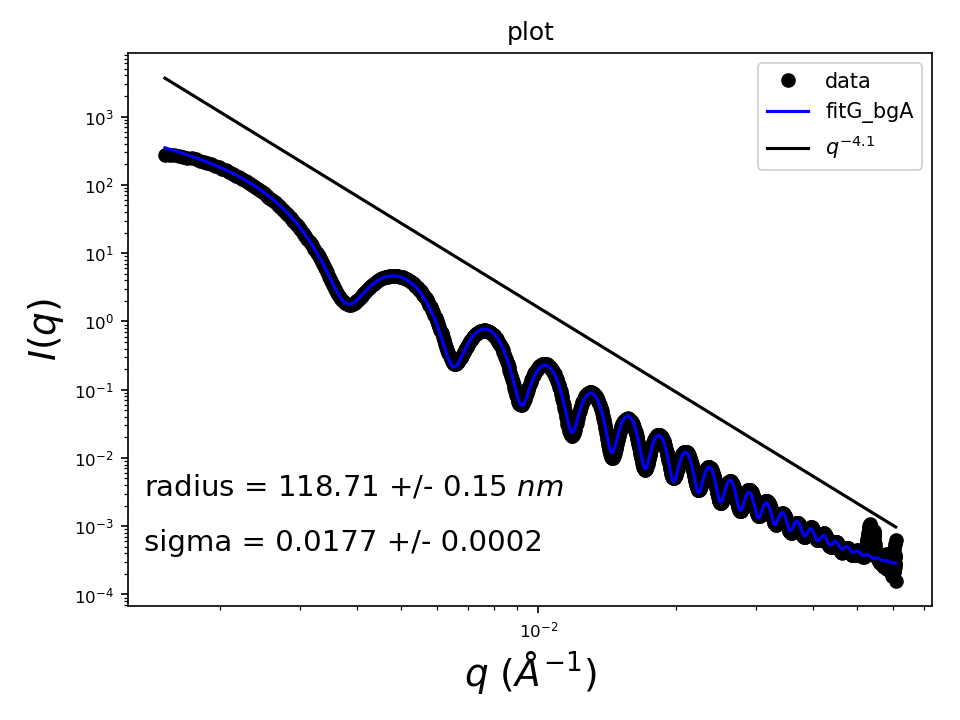

237.92

In [11]:
fig = plt.figure( )#figsize=[8,6]) 
ax = fig.add_subplot( 1,1,1 )   
plot1D(x=qp,y=pq,ax=ax,m='o', ls='',c='k', legend='data', logy=True) 

#plot1D(x=q,y=pqfit,ax=ax,m='', ls='-',c='g', legend='fitManu', logy=True) 
#plot1D(x=q_2,y=fitq2 + bk2  ,ax=ax,m='', ls='-',c='r', legend='fitG', logy=True) 

#plot1D(x=q_,y=fitq,ax=ax,m='', ls='-',c='r', legend='fitG_bg', logy=True)#, logx=True ) 
plot1D(x=qp,y=ff,ax=ax,m='', ls='-',c='b', legend='fitG_bgA', logy=True)#, logx=True ) 

#plot1D(x=q, y = bk, ls='--',c='g',ax=ax, lw=1, markersize=2,)

#qpower_scale, qpower
plot1D(x=qp, y= qp**( qpower ) * np.exp( qpower_scale ) /1e8, ax=ax, m='', ls='-', c='k', legend= r'$q^{%.1f}$'% qpower) 

txts = r'radius' + r' = %.2f +/- %.2f '%( radius/10, fitpe['radius'] ) +   r'$ nm$' 
ax.text(x =0.02, y=.2, s=txts, fontsize=14, transform=ax.transAxes)
txts = r'sigma' + r' = %.4f +/- %.4f'%( sigma, fitpe['sigma'])  
#txts = r'$\beta$' + r'$ = %.3f$'%(beta[i]) +  r'$ s^{-1}$'
ax.text(x =0.02, y=.1, s=txts, fontsize=14, transform=ax.transAxes)  
   
ax.set_xscale('log')    
#ax.set_ylim( [1.00, 1.15 ] )
ax.set_xlabel(r'$q$ ('r'$\AA^{-1}$)', fontsize=18)        
ax.set_ylabel(r'$I(q)$', fontsize=18)   
#ax.set_title(  'uid=%s'%uid, fontsize=18)  
plt.tight_layout()

118.96*2